In [99]:
##This cell will be used for all required packages
import pandas as pd
import requests
import json
from pyjstat import pyjstat
import seaborn as sns
import matplotlib.pyplot as plt #visualisation
%matplotlib inline 

from configparser import ConfigParser

#supressing warnings
import warnings
warnings.filterwarnings('ignore')


import datetime as dt
from sklearn.cluster import KMeans
import folium

In [ ]:
#pip install folium

## Looking at mode of transport dataset by Electoral Division Dublin

In [6]:
# reading in from CSO REST API

URL = 'https://ws.cso.ie/public/api.restful/PxStat.Data.Cube_API.ReadDataset/SAP2022T11T1ED/JSON-stat/2.0/en'

#using pyjstat to read in json format
dataset = pyjstat.Dataset.read(URL)

mode_of_transport = dataset.write('dataframe')
mode_of_transport

,Statistic,Census Year,CSO Electoral Divisions 2022,Means of Travel,value
0,Usually resident by means of travel to work,2022,"Agha, Carlow",On Foot,2.0
1,Usually resident by means of travel to work,2022,"Agha, Carlow",Bicycle,0.0
2,Usually resident by means of travel to work,2022,"Agha, Carlow","Bus, minibus or coach",0.0
3,Usually resident by means of travel to work,2022,"Agha, Carlow","Train, DART or LUAS",2.0
4,Usually resident by means of travel to work,2022,"Agha, Carlow",Motorcycle or scooter,0.0
...,...,...,...,...,...
123151,"Usually resident by means of travel to work, s...",2022,Ireland,Van,148823.0
123152,"Usually resident by means of travel to work, s...",2022,Ireland,Other (incl. lorry),14092.0
123153,"Usually resident by means of travel to work, s...",2022,Ireland,Work mainly at or from home,266726.0
123154,"Usually resident by means of travel to work, s...",2022,Ireland,Not stated,266412.0


In [7]:
mode_of_transport.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123156 entries, 0 to 123155
Data columns (total 5 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Statistic                     123156 non-null  object 
 1   Census Year                   123156 non-null  object 
 2   CSO Electoral Divisions 2022  123156 non-null  object 
 3   Means of Travel               123156 non-null  object 
 4   value                         123156 non-null  float64
dtypes: float64(1), object(4)
memory usage: 4.7+ MB


In [8]:
mode_of_transport.describe(include=object)

,Statistic,Census Year,CSO Electoral Divisions 2022,Means of Travel
count,123156,123156,123156,123156
unique,3,1,3421,12
top,Usually resident by means of travel to work,2022,"Agha, Carlow",On Foot
freq,41052,123156,36,10263


In [9]:
mode_of_transport['Statistic'].unique()

array(['Usually resident by means of travel to work',
       'Usually resident by means of travel to school, college or childcare',
       'Usually resident by means of travel to work, school, college or childcare (total)'],
      dtype=object)

In [10]:
mode_of_transport['Means of Travel'].unique()

array(['On Foot', 'Bicycle', 'Bus, minibus or coach',
       'Train, DART or LUAS', 'Motorcycle or scooter', 'Car Driver',
       'Car passenger', 'Van', 'Other (incl. lorry)',
       'Work mainly at or from home', 'Not stated', 'Total'], dtype=object)

In [11]:
mode_of_transport.nunique()

Statistic                          3
Census Year                        1
CSO Electoral Divisions 2022    3421
Means of Travel                   12
value                           2681
dtype: int64

In [12]:
#airtraffic_df.duplicated().sum()
mode_of_transport.duplicated().sum()

0

In [13]:
mode_of_transport = mode_of_transport.drop(columns='Census Year')

In [14]:
mode_of_transport.isnull().sum()

Statistic                       0
CSO Electoral Divisions 2022    0
Means of Travel                 0
value                           0
dtype: int64

In [15]:
stat_list = mode_of_transport['Statistic'].unique()

In [16]:
##creating three seperate dataframes based on Statistic values, then dropping the unnecessary Statistic column 
travel_to_work = mode_of_transport[mode_of_transport['Statistic']==stat_list[0]].drop(columns='Statistic')

travel_to_education = mode_of_transport[mode_of_transport['Statistic']==stat_list[1]].drop(columns='Statistic')

travel_to_all = mode_of_transport[mode_of_transport['Statistic']==stat_list[2]].drop(columns='Statistic')

In [17]:
travel_to_all['Means of Travel'].unique()

array(['On Foot', 'Bicycle', 'Bus, minibus or coach',
       'Train, DART or LUAS', 'Motorcycle or scooter', 'Car Driver',
       'Car passenger', 'Van', 'Other (incl. lorry)',
       'Work mainly at or from home', 'Not stated', 'Total'], dtype=object)

In [18]:
travel_to_all.describe()

,value
count,4.105200e+04
mean,3.520811e+02
std,1.950423e+04
min,0.000000e+00
25%,4.000000e+00
50%,2.500000e+01
75%,1.190000e+02
max,3.613408e+06


In [19]:
travel_to_work = travel_to_work.pivot(index='CSO Electoral Divisions 2022',columns='Means of Travel',values='value').reset_index()
travel_to_education = travel_to_education.pivot(index='CSO Electoral Divisions 2022',columns='Means of Travel',values='value').reset_index()
travel_to_all = travel_to_all.pivot(index='CSO Electoral Divisions 2022',columns='Means of Travel',values='value').reset_index()

In [20]:
dublin_df = travel_to_all[travel_to_all['CSO Electoral Divisions 2022'].str.contains('Dublin')].reset_index()
dublin_df = dublin_df.drop(columns = 'index')

In [21]:
dublin_df['Total'].sum()

633719.0

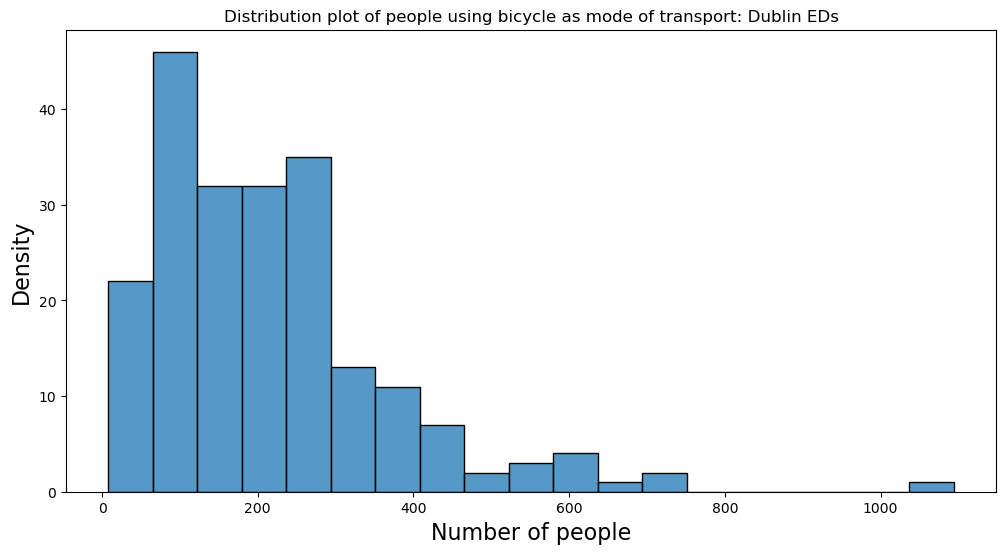

In [22]:
#plotting distribution plot of the passengers column to get an idea of the data range
plt.figure(figsize=(12,6))
sns.histplot(dublin_df['Bicycle'],)
plt.title('Distribution plot of people using bicycle as mode of transport: Dublin EDs')
plt.xlabel("Number of people",fontsize=16)
plt.ylabel("Density",fontsize=16)
plt.show()

In [23]:
dublin_df.head()

Means of Travel,CSO Electoral Divisions 2022,Bicycle,"Bus, minibus or coach",Car Driver,Car passenger,Motorcycle or scooter,Not stated,On Foot,Other (incl. lorry),Total,"Train, DART or LUAS",Van,Work mainly at or from home
0,"Arran Quay A, Dublin City",132.0,206.0,131.0,29.0,3.0,301.0,363.0,2.0,1387.0,96.0,13.0,111.0
1,"Arran Quay B, Dublin City",296.0,439.0,239.0,46.0,16.0,1919.0,819.0,4.0,4380.0,302.0,7.0,293.0
2,"Arran Quay C, Dublin City",241.0,433.0,207.0,51.0,19.0,720.0,1011.0,8.0,3471.0,381.0,8.0,392.0
3,"Arran Quay D, Dublin City",262.0,270.0,287.0,79.0,9.0,608.0,440.0,1.0,2317.0,138.0,25.0,198.0
4,"Arran Quay E, Dublin City",307.0,314.0,316.0,69.0,11.0,332.0,706.0,4.0,2491.0,125.0,24.0,283.0


In [24]:
#dub_areas = list(dublin_df['CSO Electoral Divisions 2022'].unique())

In [25]:
cols_of_interest = dublin_df.drop(columns=['CSO Electoral Divisions 2022',
                        'Work mainly at or from home',
                        'Total', 
                        'Not stated']).columns

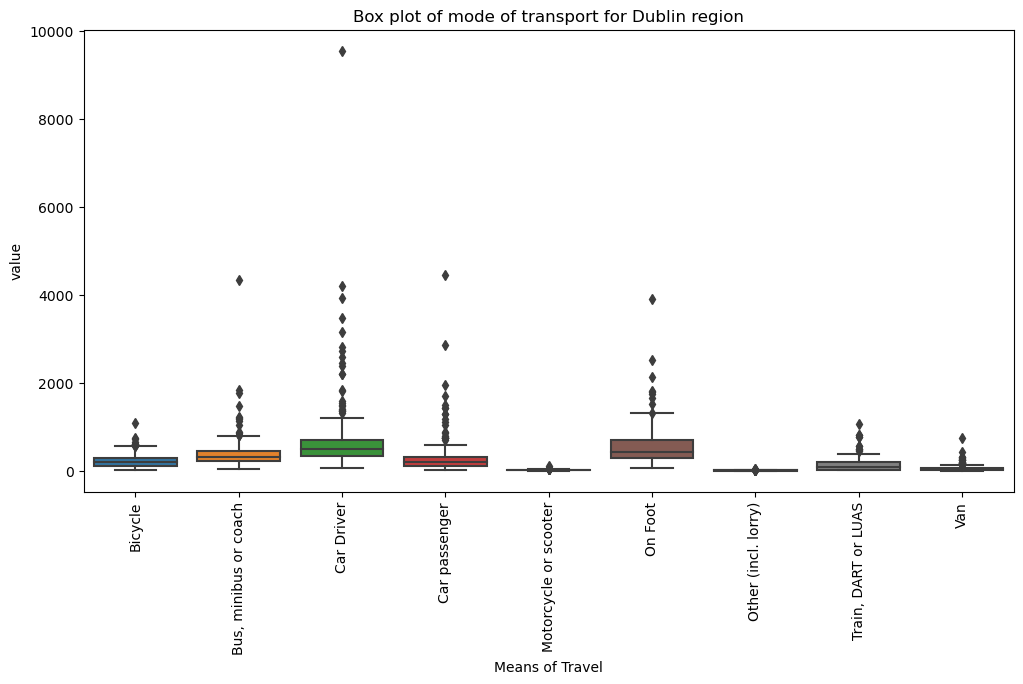

In [26]:
#box plots
plt.figure(figsize = (12,6))
sns.boxplot(x="Means of Travel", y="value", data=pd.melt(dublin_df[cols_of_interest]))
plt.title('Box plot of mode of transport for Dublin region')
plt.xticks(rotation=90,fontsize=10)
plt.show()

In [27]:
dublin_df.rename(columns={'CSO Electoral Divisions 2022':'electoral_division',
                          'Bicycle':'bicycle',
                           'Bus, minibus or coach':'bus',
                           'On Foot':'foot',
                           'Motorcycle or scooter':'motorcycle/scooter',
                           'Train, DART or LUAS':'rail',
                           'Total':'total',
                           'Not stated':'not stated',
                           'Other (incl. lorry)':'other'
                          }, inplace=True)

In [28]:
dublin_df['car'] = dublin_df['Car Driver'] + dublin_df['Car passenger'] + dublin_df['Van']

In [29]:
#since we are only interested in those that commute for each electoral division, I will subtract work from home from the total
dublin_df['total'] = dublin_df['total'] - dublin_df['Work mainly at or from home']

In [30]:
dublin_df = dublin_df.drop(columns=['Car Driver','Car passenger','Van','Work mainly at or from home'])

In [31]:
dublin_df = dublin_df[['electoral_division','bicycle','foot','motorcycle/scooter',
                       'bus','car','rail','other','not stated','total']]

In [32]:
dublin_df

Means of Travel,electoral_division,bicycle,foot,motorcycle/scooter,bus,car,rail,other,not stated,total
0,"Arran Quay A, Dublin City",132.0,363.0,3.0,206.0,173.0,96.0,2.0,301.0,1276.0
1,"Arran Quay B, Dublin City",296.0,819.0,16.0,439.0,292.0,302.0,4.0,1919.0,4087.0
2,"Arran Quay C, Dublin City",241.0,1011.0,19.0,433.0,266.0,381.0,8.0,720.0,3079.0
3,"Arran Quay D, Dublin City",262.0,440.0,9.0,270.0,391.0,138.0,1.0,608.0,2119.0
4,"Arran Quay E, Dublin City",307.0,706.0,11.0,314.0,409.0,125.0,4.0,332.0,2208.0
...,...,...,...,...,...,...,...,...,...,...
206,"Whitehall B, Dublin City",234.0,583.0,19.0,603.0,1088.0,27.0,4.0,257.0,2815.0
207,"Whitehall C, Dublin City",145.0,213.0,12.0,533.0,767.0,24.0,1.0,206.0,1901.0
208,"Whitehall D, Dublin City",163.0,359.0,12.0,361.0,755.0,26.0,7.0,183.0,1866.0
209,"Wood Quay A, Dublin City",98.0,592.0,8.0,203.0,243.0,60.0,1.0,342.0,1547.0


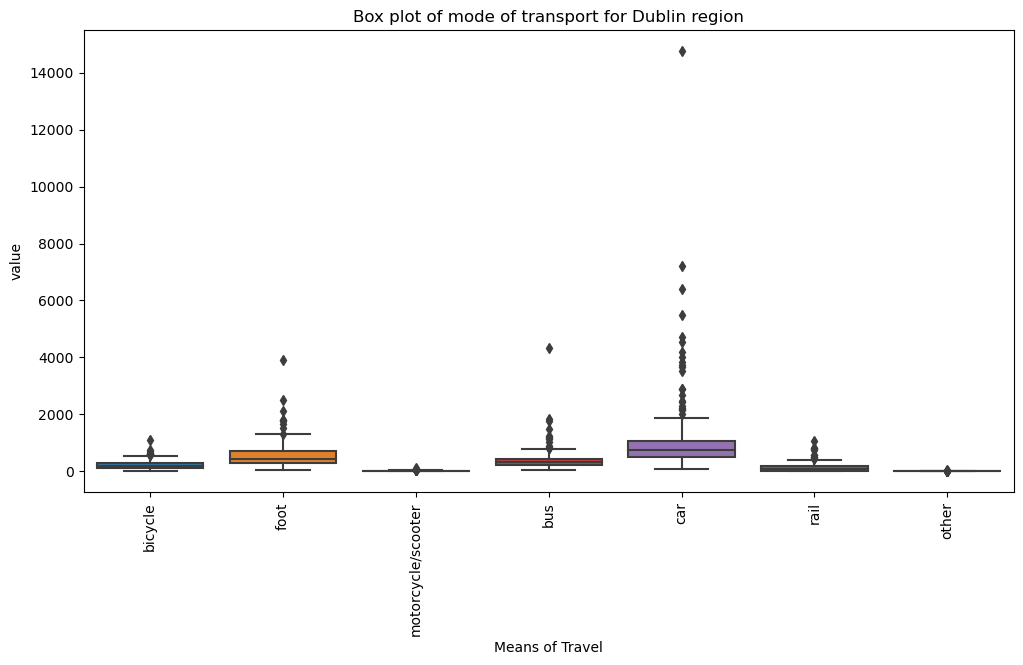

In [33]:
#box plots
cols = ['bicycle','foot','motorcycle/scooter','bus','car','rail','other']

plt.figure(figsize = (12,6))
sns.boxplot(x="Means of Travel", y="value", data=pd.melt(dublin_df[cols]))
plt.title('Box plot of mode of transport for Dublin region')
plt.xticks(rotation=90,fontsize=10)
plt.show()

In [34]:
## adding motorcycle/scooter into other as these values are quite small

dublin_df['other'] = dublin_df['motorcycle/scooter'] + dublin_df['other']
dublin_df = dublin_df.drop(columns='motorcycle/scooter')

In [36]:
##getting proportions
cols = ['bicycle','foot','bus','car','rail','other','not stated']
df_agg = pd.DataFrame()

for col in cols:
    data = pd.DataFrame({'mode':[col],'value':[dublin_df[str(col)].sum()]})
    df_agg = pd.concat([df_agg,data])

df_agg = df_agg.reset_index().drop(columns='index') 
df_agg = df_agg.sort_values('value',ascending=False)

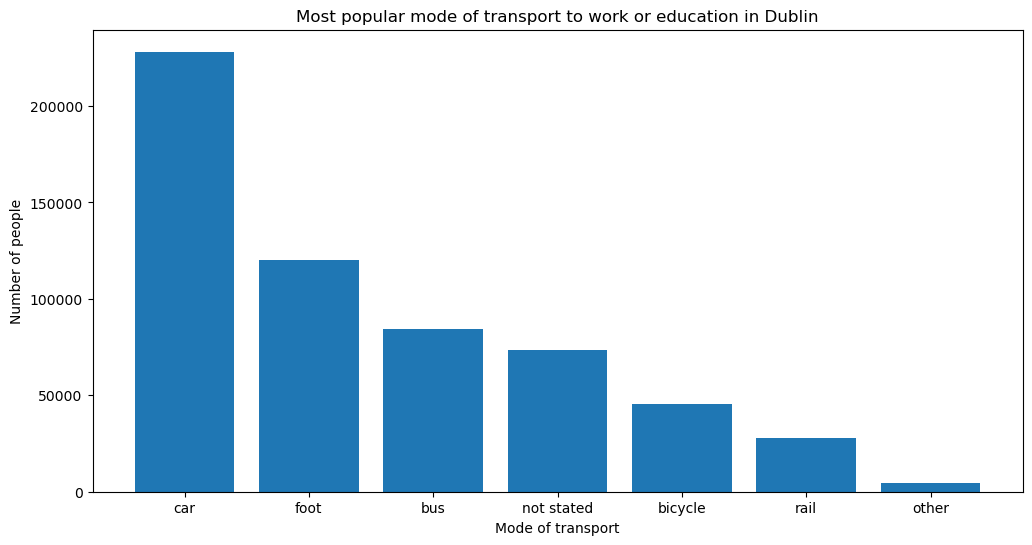

In [37]:
plt.figure(figsize = (12,6))
plt.bar(df_agg['mode'],df_agg['value'])
plt.title('Most popular mode of transport to work or education in Dublin')
plt.xlabel('Mode of transport')
plt.ylabel('Number of people')
plt.show()

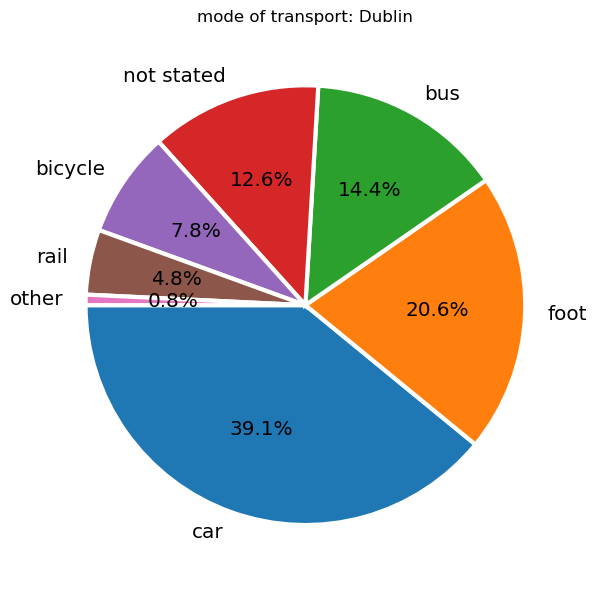

In [47]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.pie(df_agg['value'], labels=df_agg['mode'], autopct='%.1f%%',
       wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
       textprops={'size': 'x-large'},
       startangle=180)
ax.set_title('mode of transport: Dublin', fontsize=12)

plt.tight_layout()

In [518]:
#(dublin_df['electoral_division'].unique())

In [64]:
dublin_df[['electoral_division', 'region']] = dublin_df['electoral_division'].str.split(',', expand=True)

In [67]:
dublin_df['electoral_division'] = dublin_df['electoral_division'].str.lower()

In [68]:
dublin_df

Means of Travel,electoral_division,bicycle,foot,bus,car,rail,other,not stated,total,region
0,arran quay a,132.0,363.0,206.0,173.0,96.0,5.0,301.0,1276.0,Dublin City
1,arran quay b,296.0,819.0,439.0,292.0,302.0,20.0,1919.0,4087.0,Dublin City
2,arran quay c,241.0,1011.0,433.0,266.0,381.0,27.0,720.0,3079.0,Dublin City
3,arran quay d,262.0,440.0,270.0,391.0,138.0,10.0,608.0,2119.0,Dublin City
4,arran quay e,307.0,706.0,314.0,409.0,125.0,15.0,332.0,2208.0,Dublin City
...,...,...,...,...,...,...,...,...,...,...
206,whitehall b,234.0,583.0,603.0,1088.0,27.0,23.0,257.0,2815.0,Dublin City
207,whitehall c,145.0,213.0,533.0,767.0,24.0,13.0,206.0,1901.0,Dublin City
208,whitehall d,163.0,359.0,361.0,755.0,26.0,19.0,183.0,1866.0,Dublin City
209,wood quay a,98.0,592.0,203.0,243.0,60.0,9.0,342.0,1547.0,Dublin City


# getting Dublin Bike data from smartDublin for 2022

In [393]:
month = ['01','02','03','04','05','06','07','08','09','10','11','12']
dublin_bike = pd.DataFrame()

for m in month:
    monthly_df = pd.read_csv(f'dublinbike-historical-data-2022-{m}.csv')
    dublin_bike = pd.concat([dublin_bike,monthly_df])

In [394]:
dublin_bike.columns

Index(['STATION ID', 'TIME', 'LAST UPDATED', 'NAME', 'BIKE_STANDS',
       'AVAILABLE_BIKE_STANDS', 'AVAILABLE_BIKES', 'STATUS', 'ADDRESS',
       'LATITUDE', 'LONGITUDE'],
      dtype='object')

In [395]:
dublin_bike

,STATION ID,TIME,LAST UPDATED,NAME,BIKE_STANDS,AVAILABLE_BIKE_STANDS,AVAILABLE_BIKES,STATUS,ADDRESS,LATITUDE,LONGITUDE
0,2,2022-01-01 00:00:04,2021-12-31 23:57:39,BLESSINGTON STREET,20,10,10,OPEN,Blessington Street,53.3568,-6.26814
1,3,2022-01-01 00:00:04,2021-12-31 23:49:57,BOLTON STREET,20,19,1,OPEN,Bolton Street,53.3512,-6.26986
2,4,2022-01-01 00:00:04,2021-12-31 23:58:39,GREEK STREET,20,9,11,OPEN,Greek Street,53.3469,-6.27298
3,5,2022-01-01 00:00:04,2021-12-31 23:51:48,CHARLEMONT PLACE,40,17,23,OPEN,Charlemont Street,53.3307,-6.26018
4,6,2022-01-01 00:00:04,2021-12-31 23:59:13,CHRISTCHURCH PLACE,20,13,7,OPEN,Christchurch Place,53.3434,-6.27012
...,...,...,...,...,...,...,...,...,...,...,...
168139,113,2022-12-31 23:30:02,2022-12-31 23:28:52,MERRION SQUARE SOUTH,40,28,12,OPEN,Merrion Square South,53.3386,-6.24861
168140,114,2022-12-31 23:30:02,2022-12-31 23:22:06,WILTON TERRACE (PARK),40,34,6,OPEN,Wilton Terrace (Park),53.3337,-6.24834
168141,115,2022-12-31 23:30:02,2022-12-31 23:29:17,KILLARNEY STREET,30,24,6,OPEN,Killarney Street,53.3548,-6.24758
168142,116,2022-12-31 23:30:02,2022-12-31 23:26:30,BROADSTONE,30,28,2,OPEN,Broadstone,53.3547,-6.27231


In [396]:
#dublin_bike['ADDRESS'].unique()

In [397]:
dublin_bike.head()

,STATION ID,TIME,LAST UPDATED,NAME,BIKE_STANDS,AVAILABLE_BIKE_STANDS,AVAILABLE_BIKES,STATUS,ADDRESS,LATITUDE,LONGITUDE
0,2,2022-01-01 00:00:04,2021-12-31 23:57:39,BLESSINGTON STREET,20,10,10,OPEN,Blessington Street,53.3568,-6.26814
1,3,2022-01-01 00:00:04,2021-12-31 23:49:57,BOLTON STREET,20,19,1,OPEN,Bolton Street,53.3512,-6.26986
2,4,2022-01-01 00:00:04,2021-12-31 23:58:39,GREEK STREET,20,9,11,OPEN,Greek Street,53.3469,-6.27298
3,5,2022-01-01 00:00:04,2021-12-31 23:51:48,CHARLEMONT PLACE,40,17,23,OPEN,Charlemont Street,53.3307,-6.26018
4,6,2022-01-01 00:00:04,2021-12-31 23:59:13,CHRISTCHURCH PLACE,20,13,7,OPEN,Christchurch Place,53.3434,-6.27012


In [398]:
#selecting only the OPEN bike stations
dublin_bike = dublin_bike[dublin_bike['STATUS']=='OPEN']

In [399]:
#checking for duplicates
dublin_bike.duplicated().sum()

0

In [400]:
#converting LAST UPDATED to be a time type
dublin_bike['DATETIME'] = [dt.datetime.strptime(d, "%Y-%m-%d %H:%M:%S") for d in dublin_bike["LAST UPDATED"]]

In [401]:
#extracting time value
dublin_bike['LAST UPDATED'] = [dt.datetime.time(d) for d in dublin_bike['DATETIME']] 

In [402]:
#creating date column 
dublin_bike['DATE'] = [dt.datetime.date(d) for d in dublin_bike['DATETIME']] 

In [403]:
#creating a time column
dublin_bike['TIME'] = [dt.datetime.time(d) for d in dublin_bike['DATETIME']] 
dublin_bike['ROUNDED_TIME'] = [dt.datetime.time(d) for d in (dublin_bike_new['DATETIME'].dt.floor('H'))]

In [404]:
#dublin_bike.iloc[0]['TIME']

In [405]:
#calculate occupancy of each bike stand
dublin_bike['AVAILABILITY'] = dublin_bike['AVAILABLE_BIKES'] / dublin_bike['BIKE_STANDS']

In [406]:
def get_weekday(date):
    daynumber = date.dayofweek
    if daynumber <= 4:
        daytype = "weekday"
    elif daynumber in (5, 6):
        daytype = "weekend"
    return daytype

In [407]:
dublin_bike['DAY_TYPE']=dublin_bike['DATETIME'].apply(get_weekday)

In [408]:
dublin_bike.head()

,STATION ID,TIME,LAST UPDATED,NAME,BIKE_STANDS,AVAILABLE_BIKE_STANDS,AVAILABLE_BIKES,STATUS,ADDRESS,LATITUDE,LONGITUDE,DATETIME,DATE,ROUNDED_TIME,AVAILABILITY,DAY_TYPE
0,2,23:57:39,23:57:39,BLESSINGTON STREET,20,10,10,OPEN,Blessington Street,53.3568,-6.26814,2021-12-31 23:57:39,2021-12-31,23:00:00,0.500,weekday
1,3,23:49:57,23:49:57,BOLTON STREET,20,19,1,OPEN,Bolton Street,53.3512,-6.26986,2021-12-31 23:49:57,2021-12-31,23:00:00,0.050,weekday
2,4,23:58:39,23:58:39,GREEK STREET,20,9,11,OPEN,Greek Street,53.3469,-6.27298,2021-12-31 23:58:39,2021-12-31,23:00:00,0.550,weekday
3,5,23:51:48,23:51:48,CHARLEMONT PLACE,40,17,23,OPEN,Charlemont Street,53.3307,-6.26018,2021-12-31 23:51:48,2021-12-31,23:00:00,0.575,weekday
4,6,23:59:13,23:59:13,CHRISTCHURCH PLACE,20,13,7,OPEN,Christchurch Place,53.3434,-6.27012,2021-12-31 23:59:13,2021-12-31,23:00:00,0.350,weekday


In [410]:
#slimming down the dataset
dublin_bike_new = dublin_bike.copy()

dublin_bike_new = dublin_bike_new[['DATE','TIME','ROUNDED_TIME','BIKE_STANDS','AVAILABLE_BIKES','AVAILABILITY',
                                   'ADDRESS','LATITUDE','LONGITUDE','DATETIME', 'DAY_TYPE']]
dublin_bike_new.head()

,DATE,TIME,ROUNDED_TIME,BIKE_STANDS,AVAILABLE_BIKES,AVAILABILITY,ADDRESS,LATITUDE,LONGITUDE,DATETIME,DAY_TYPE
0,2021-12-31,23:57:39,23:00:00,20,10,0.500,Blessington Street,53.3568,-6.26814,2021-12-31 23:57:39,weekday
1,2021-12-31,23:49:57,23:00:00,20,1,0.050,Bolton Street,53.3512,-6.26986,2021-12-31 23:49:57,weekday
2,2021-12-31,23:58:39,23:00:00,20,11,0.550,Greek Street,53.3469,-6.27298,2021-12-31 23:58:39,weekday
3,2021-12-31,23:51:48,23:00:00,40,23,0.575,Charlemont Street,53.3307,-6.26018,2021-12-31 23:51:48,weekday
4,2021-12-31,23:59:13,23:00:00,20,7,0.350,Christchurch Place,53.3434,-6.27012,2021-12-31 23:59:13,weekday


In [411]:
dublin_bike_new['ROUNDED_TIME'] = dublin_bike_new['ROUNDED_TIME'].astype('str')

## Visualization of average usage time by each minute

In [467]:
availability_per_hour_wd = dublin_bike_new[dublin_bike_new['DAY_TYPE']=='weekday'].groupby('ROUNDED_TIME')['AVAILABILITY'].mean().reset_index()
availability_per_hour_wd['ROUNDED_TIME'] = availability_per_hour_wd['ROUNDED_TIME'].str[:-3]
availability_per_hour_wd.head()

,ROUNDED_TIME,AVAILABILITY
0,00:00,0.402214
1,01:00,0.404575
2,02:00,0.404576
3,03:00,0.404689
4,04:00,0.404685


In [464]:
availability_per_hour_we = dublin_bike_new[dublin_bike_new['DAY_TYPE']=='weekend'].groupby('ROUNDED_TIME')['AVAILABILITY'].mean().reset_index()
availability_per_hour_we['ROUNDED_TIME'] = availability_per_hour_we['ROUNDED_TIME'].str[:-3]
availability_per_hour_we.head()

,ROUNDED_TIME,AVAILABILITY
0,00:00,0.409106
1,01:00,0.413629
2,02:00,0.414514
3,03:00,0.414805
4,04:00,0.414935


In [465]:
ticks = []
for i,n in enumerate(availability_per_hour['ROUNDED_TIME']):
    if i%2 == 0:
        ticks.append(n)
ticks

['00:00',
 '02:00',
 '04:00',
 '06:00',
 '08:00',
 '10:00',
 '12:00',
 '14:00',
 '16:00',
 '18:00',
 '20:00',
 '22:00']

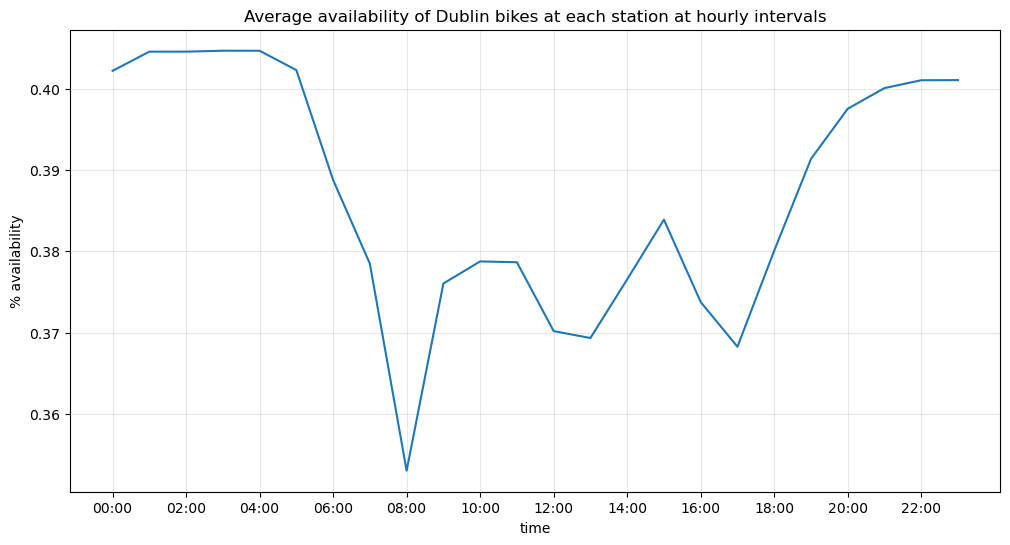

In [468]:
plt.figure(figsize=(12,6))
plt.title('Average availability of Dublin bikes at each station at hourly intervals')

sns.lineplot(data = availability_per_hour_wd, x='ROUNDED_TIME',y='AVAILABILITY',l)

plt.xticks(ticks)
plt.ylabel('% availability')
plt.xlabel('time')
plt.grid(True,alpha=0.3)

plt.show()

## Clustering the stations

In [481]:
dublin_bike_new.head()

,DATE,TIME,ROUNDED_TIME,BIKE_STANDS,AVAILABLE_BIKES,AVAILABILITY,ADDRESS,LATITUDE,LONGITUDE,DATETIME,DAY_TYPE,CLUSTER_TIME
0,2021-12-31,23:57:39,23:00:00,20,10,0.500,Blessington Street,53.3568,-6.26814,2021-12-31 23:57:39,weekday,23:00:00 weekday
1,2021-12-31,23:49:57,23:00:00,20,1,0.050,Bolton Street,53.3512,-6.26986,2021-12-31 23:49:57,weekday,23:00:00 weekday
2,2021-12-31,23:58:39,23:00:00,20,11,0.550,Greek Street,53.3469,-6.27298,2021-12-31 23:58:39,weekday,23:00:00 weekday
3,2021-12-31,23:51:48,23:00:00,40,23,0.575,Charlemont Street,53.3307,-6.26018,2021-12-31 23:51:48,weekday,23:00:00 weekday
4,2021-12-31,23:59:13,23:00:00,20,7,0.350,Christchurch Place,53.3434,-6.27012,2021-12-31 23:59:13,weekday,23:00:00 weekday


In [482]:
#setting up data for clustering
dublin_bike_new['CLUSTER_TIME'] = dublin_bike_new['ROUNDED_TIME'] +" "+ dublin_bike_new['DAY_TYPE']

In [490]:
dublin_bike_new = dublin_bike_new.groupby(['ADDRESS','LATITUDE',
                                           'LONGITUDE','CLUSTER_TIME'],as_index=False)['AVAILABILITY'].mean()

In [494]:
dublin_bike_new = dublin_bike_new.pivot_table(index=['ADDRESS',
                                                     'LATITUDE',
                                                     'LONGITUDE'],columns=['CLUSTER_TIME'],values='AVAILABILITY')

In [496]:
dublin_bike_new = dublin_bike_new.reset_index()

In [499]:
dublin_bike_new = dublin_bike_new.set_index('ADDRESS')

In [503]:
dublin_bike_new = dublin_bike_new.dropna()

In [505]:
X = dublin_bike_new.drop(columns=['LATITUDE','LONGITUDE'])

In [508]:
X.head()

CLUSTER_TIME,00:00:00 weekday,00:00:00 weekend,01:00:00 weekday,01:00:00 weekend,02:00:00 weekday,02:00:00 weekend,03:00:00 weekday,03:00:00 weekend,04:00:00 weekday,04:00:00 weekend,...,19:00:00 weekday,19:00:00 weekend,20:00:00 weekday,20:00:00 weekend,21:00:00 weekday,21:00:00 weekend,22:00:00 weekday,22:00:00 weekend,23:00:00 weekday,23:00:00 weekend
ADDRESS,,,,,,,,,,,,,,,,,,,,,
Avondale Road,0.432804,0.328707,0.434186,0.332925,0.433887,0.334422,0.433564,0.334422,0.434508,0.334422,...,0.400332,0.272245,0.417857,0.259864,0.421096,0.252109,0.433134,0.256463,0.445178,0.262748
Benson Street,0.126803,0.197619,0.127918,0.203810,0.127810,0.203095,0.127961,0.203095,0.127961,0.203333,...,0.117587,0.257500,0.114154,0.273690,0.115455,0.273929,0.103137,0.266667,0.095597,0.257536
Blackhall Place,0.716895,0.637937,0.720964,0.652698,0.720284,0.645933,0.720194,0.647867,0.720000,0.647302,...,0.545155,0.576667,0.567708,0.605556,0.612723,0.612857,0.645165,0.634127,0.678520,0.659968
Blessington Street,0.615128,0.462857,0.620294,0.477381,0.618945,0.480000,0.618395,0.480714,0.618689,0.480952,...,0.401074,0.247381,0.449167,0.251190,0.475879,0.264048,0.544923,0.287857,0.598225,0.331100
Bolton Street,0.530176,0.710714,0.535117,0.719286,0.537791,0.719524,0.538738,0.719231,0.537282,0.720755,...,0.482171,0.737857,0.491820,0.745238,0.496117,0.755714,0.505989,0.740714,0.507115,0.734450


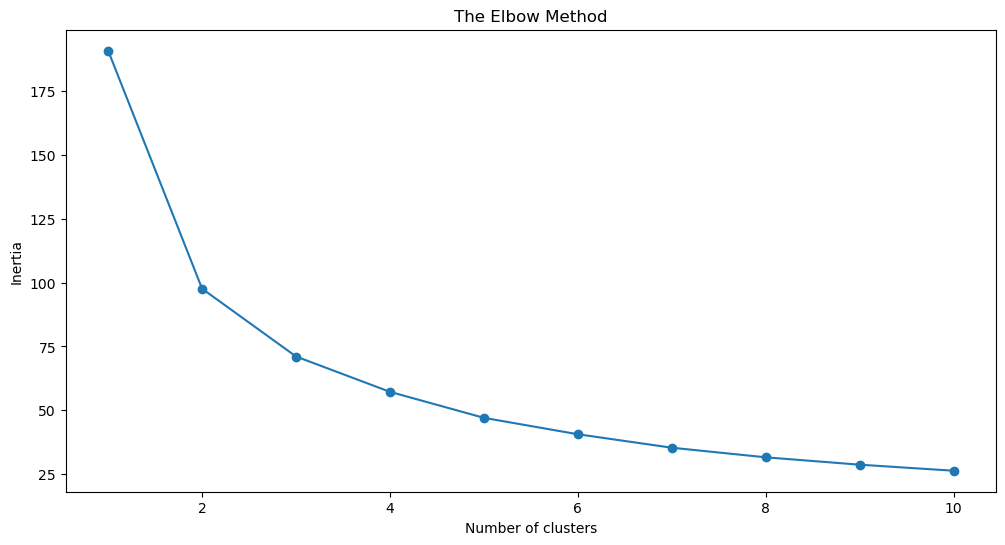

In [512]:
inertia = []                 
#determining the optimal number of clusters using elbow method

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
    #print(kmeans.inertia_)

# Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.figure(figsize=(12,6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')    
plt.show()

picking 5 as the number of clusters 

In [525]:
kmeans = KMeans(n_clusters=5, random_state = 0)
kmeans_clusters = kmeans.fit_predict(X)

# Adding the K-Means cluster information to the dataset
dublin_bike_new['KMeans_Cluster'] = kmeans_clusters

In [527]:
dublin_bike_new.head()

CLUSTER_TIME,LATITUDE,LONGITUDE,00:00:00 weekday,00:00:00 weekend,01:00:00 weekday,01:00:00 weekend,02:00:00 weekday,02:00:00 weekend,03:00:00 weekday,03:00:00 weekend,...,19:00:00 weekend,20:00:00 weekday,20:00:00 weekend,21:00:00 weekday,21:00:00 weekend,22:00:00 weekday,22:00:00 weekend,23:00:00 weekday,23:00:00 weekend,KMeans_Cluster
ADDRESS,,,,,,,,,,,,,,,,,,,,,
Avondale Road,53.3594,-6.27614,0.432804,0.328707,0.434186,0.332925,0.433887,0.334422,0.433564,0.334422,...,0.272245,0.417857,0.259864,0.421096,0.252109,0.433134,0.256463,0.445178,0.262748,0
Benson Street,53.3442,-6.23345,0.126803,0.197619,0.127918,0.203810,0.127810,0.203095,0.127961,0.203095,...,0.257500,0.114154,0.273690,0.115455,0.273929,0.103137,0.266667,0.095597,0.257536,1
Blackhall Place,53.3488,-6.28164,0.716895,0.637937,0.720964,0.652698,0.720284,0.645933,0.720194,0.647867,...,0.576667,0.567708,0.605556,0.612723,0.612857,0.645165,0.634127,0.678520,0.659968,2
Blessington Street,53.3568,-6.26814,0.615128,0.462857,0.620294,0.477381,0.618945,0.480000,0.618395,0.480714,...,0.247381,0.449167,0.251190,0.475879,0.264048,0.544923,0.287857,0.598225,0.331100,0
Bolton Street,53.3512,-6.26986,0.530176,0.710714,0.535117,0.719286,0.537791,0.719524,0.538738,0.719231,...,0.737857,0.491820,0.745238,0.496117,0.755714,0.505989,0.740714,0.507115,0.734450,4


In [521]:
colours = ['green','blue','red','yellow','black']
n_clusters = 5

In [529]:
mp = folium.Map(location=[53.34, -6.2603], zoom_start=14,tiles='cartodbpositron')

for c , colour in zip(range(n_clusters),colours):
    tmp = dublin_bike_new[dublin_bike_new['KMeans_Cluster'] == c]
    for location in tmp.iterrows():
            folium.CircleMarker(
                location=[location[1]['LATITUDE'],location[1]['LONGITUDE']],
                radius=7,
                popup=location[0],
                color=colour,
                fill_color=colour
            ).add_to(mp)

mp.save('map.html')
mp

In [536]:
#Analyzing usage patterns using clusters

dublin_bike = dublin_bike.merge((dublin_bike_new['KMeans_Cluster'].reset_index()), on='ADDRESS',how='left')

In [541]:
clusterAnalysis = dublin_bike[['ADDRESS','AVAILABILITY','ROUNDED_TIME','KMeans_Cluster','DAY_TYPE']]

In [555]:
clusterAnalysis['ROUNDED_TIME'] = clusterAnalysis['ROUNDED_TIME'].astype(str)

In [556]:
availability_per_hour_wd = clusterAnalysis[clusterAnalysis['DAY_TYPE']=='weekday'].groupby(['ROUNDED_TIME',
                                                                                            'KMeans_Cluster'])['AVAILABILITY'].mean().reset_index()
availability_per_hour_wd['ROUNDED_TIME'] = availability_per_hour_wd['ROUNDED_TIME'].str[:-3]
availability_per_hour_wd.head()

,ROUNDED_TIME,KMeans_Cluster,AVAILABILITY
0,00:00,0.0,0.411673
1,00:00,1.0,0.176357
2,00:00,2.0,0.701967
3,00:00,3.0,0.270857
4,00:00,4.0,0.550960


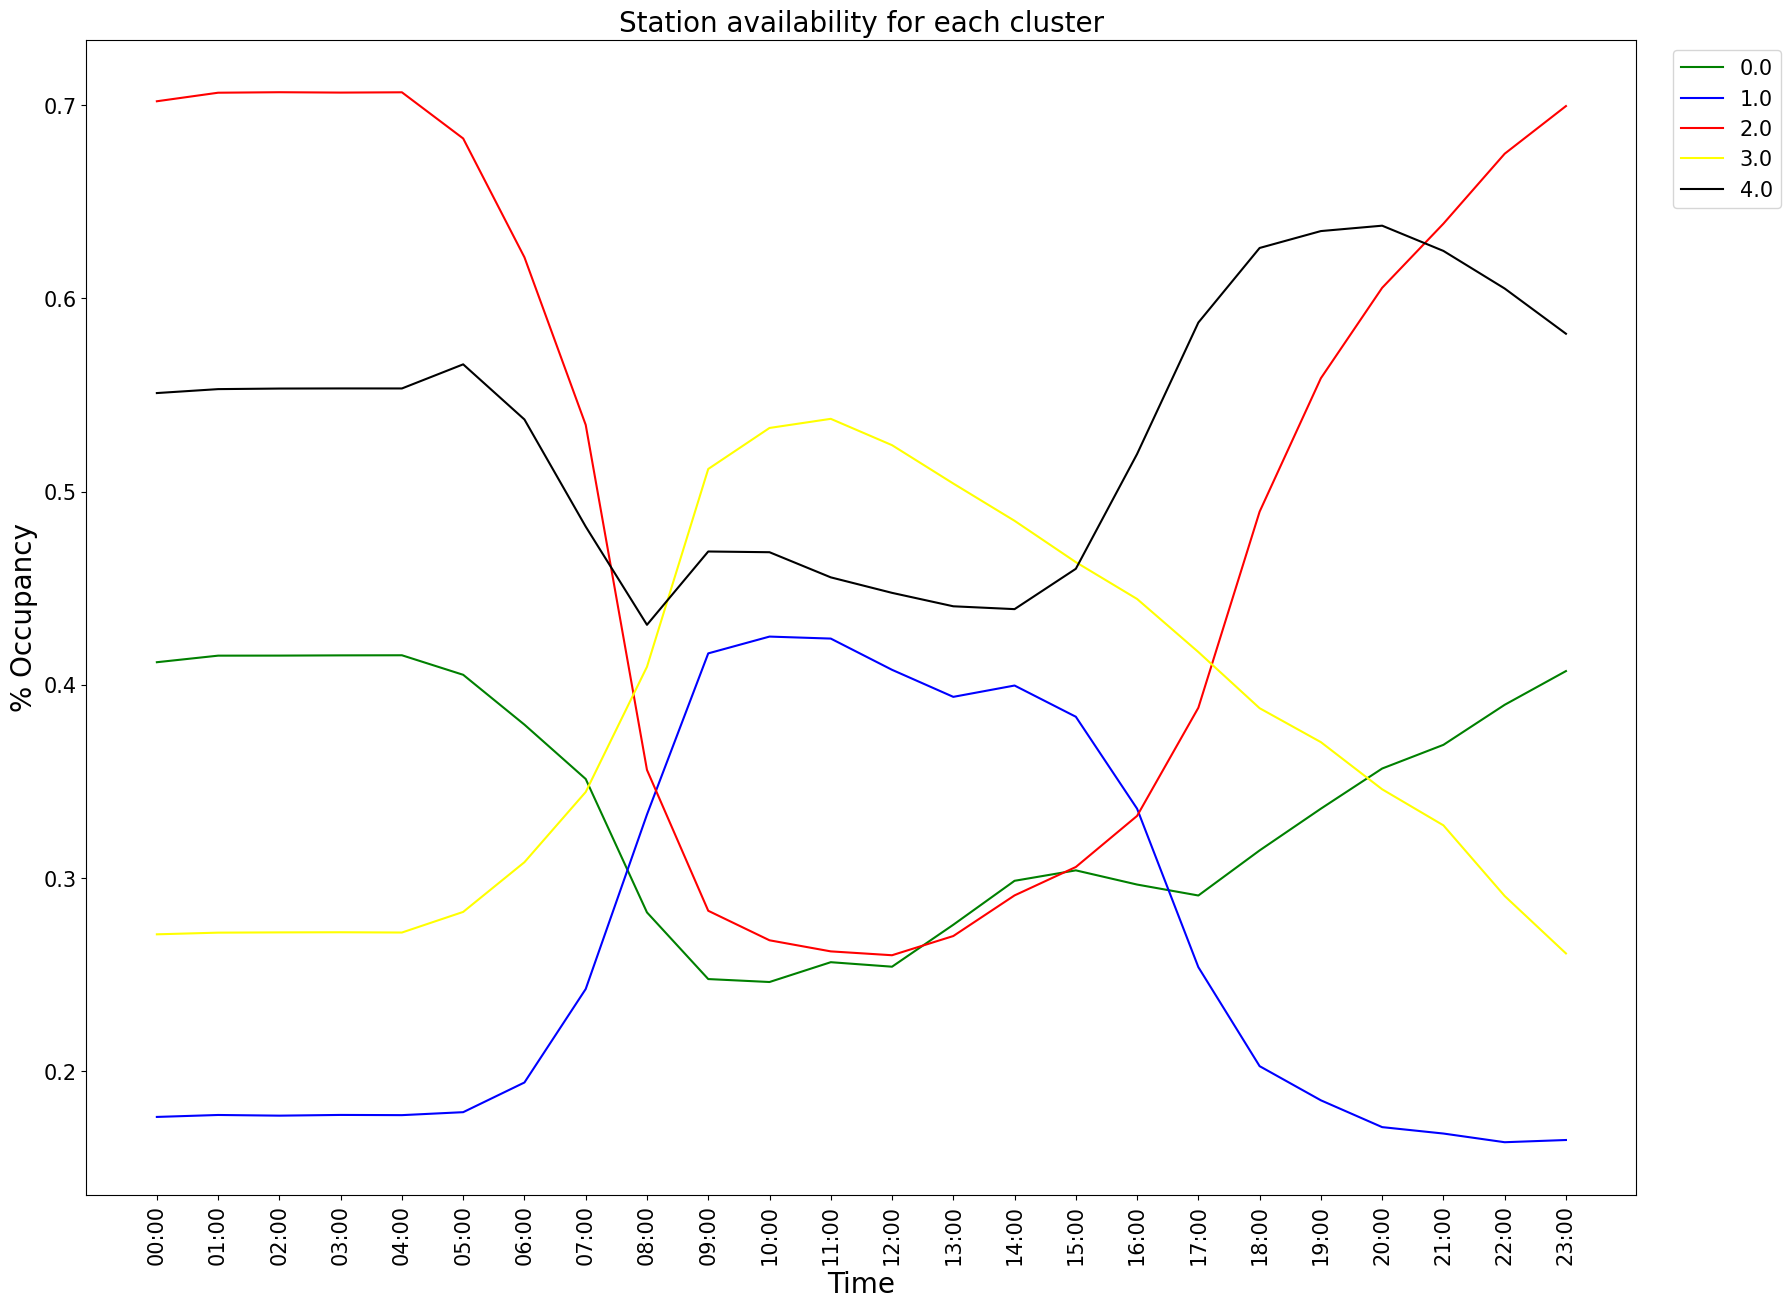

In [566]:
plt.figure(figsize =(20,15))
sns.lineplot(x='ROUNDED_TIME',y='AVAILABILITY',hue='KMeans_Cluster',data=availability_per_hour_wd, palette=colours);
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1),fontsize=15);
plt.xlabel('Time',fontsize=20)
plt.ylabel('% Occupancy',fontsize=20)
plt.xticks(fontsize=15,rotation=90);
plt.yticks(fontsize=15);
plt.title('Station availability for each cluster',fontsize=20)
plt.show()